# Analysis of FIR filters

**Topics:**
- Calculating and interpreting the frequency response of a FIR filter

**Learning goals:**
- Being able to calculate the frequency response of a FIR filter
- Understanding what the Mangitude and Phase response of a FIR filter represents
- Being able to calculate the output of a FIR filter by hand for sinusoidal input

**Libraries and notebook config:**

In [ ]:
from numpy import sin, cos, pi, exp, empty, mean, abs, angle # Sentrale matematiske funksjoner
import numpy as np                          # Importer funksjonalitet fra numpy biblioteket med prefiks "np"
import scipy.signal as sig                  # Importerer signalbehandlingsmodulen til scipy
import matplotlib.pyplot as plt             # Importer pyplot modulen i matplotlib med prefiks "plt"

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib inline


#### Convolution and the Fourier Transform

One of the most central properties of convolution as a mathematical operation is what happens when we apply a Fourier transform to an expression involving the convolution of two signals (e.g., $x[n]$ and $h[n]$). Specifically, convolving two signals in the time domain corresponds to multiplying them in the frequency domain.

$$ x[n]*h[n] \stackrel{\mathrm{DTFT}}{\longleftrightarrow} X\left(\hat{\omega}\right)\cdot H \left(\hat{\omega}\right) $$ 

This means that all frequency components $X\left(\hat{\omega}\right)$ in a signal $x[n]$ will be subject to *scaling* and *rotation*, which translates to an adjustment in amplitude and phase shift, depending on the frequency content $H\left(\hat{\omega}\right)$ of the filter's impulse response $h[n]$. If the input signal $x[n]$ is a pure sinusoidal sequence, we obtain the following expression for the output signal:

\begin{align}
x[n] &= \cos (\hat{\omega}\cdot n)\\
y[n] &= \left|H\left(\hat{\omega}\right)\right| \cdot \cos \left(\hat{\omega}\cdot n + \angle H\left(\hat{\omega}\right)\right)
\end{align}


#### Frequency Response

The expression $H\left(\hat{\omega}\right) = \mathrm{DTFT}(h[n])$ is known as the ***frequency response*** of a digital filter, as it describes exactly how all possible frequencies will be affected by the filter. The frequency response of a filter is central to the analysis of digital filters and is often represented graphically in two parts: the Magnitude Response $\left|H\left(\hat{\omega}\right)\right|$, showing amplification or attenuation of frequencies, and the Phase Response $\angle H\left(\hat{\omega}\right)$, showing phase shifts added by the filter.

It is worth emphasizing that mathematically, frequency-domain analysis of a FIR filter is no different than spectral analysis of a digital signal. As such, the frequency response of a FIR  filter can be calculated numerically in python using the [fft](https://numpy.org/doc/stable/reference/routines.fft.html) or [rfft](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html#numpy.fft.rfft) functions. By padding the FFT generously, we can achieve a high-resolution spectral representation of $H(\hat{\omega})$ which is suitable for the purposes of filter analysis. The code cell below is an example of how the frequency response of a moving average filter can be calculated.


Text(0, 0.5, 'Phase (degrees)')

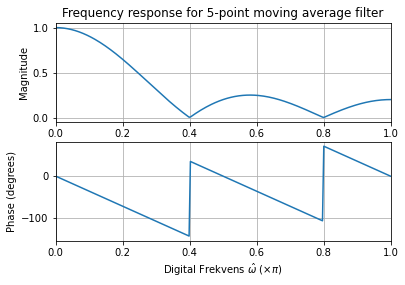

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

hn = np.ones(5)/5 # Impulse response for 5-point moving average filter

N = 512 # "DTFT" resolution
 
Hw = np.fft.rfft(hn, N)  # Calculate the frequency response of the filter
w = np.fft.rfftfreq(N)*2*np.pi  # An array of frequency values matching the frequency response

# Extract magnitude response 
Hw_mag = np.abs(Hw)  
# Extract phase response (use "unwrap" to allow for phase angles >= 180 degrees)
Hw_phase = np.unwrap(np.angle(Hw, deg=True), period=360.0)  

# Present the frequency response graphically.
plt.close(1); plt.figure(1)
plt.subplot(2,1,1)
plt.title(f'Frequency response for {len(hn)}-point moving average filter')
plt.plot(w/pi, Hw_mag)
plt.grid(True)
plt.xlim([0, 1])
plt.ylabel(r'Magnitude')
plt.subplot(2,1,2)
plt.plot(w/pi, Hw_phase)
plt.grid(True)
plt.xlim([0, 1])
plt.xlabel(r'Digital Frekvens $\hat{\omega} \ (\times \pi)$')
plt.ylabel(r'Phase (degrees)')

PS: There is naturally a specialized function [`scipy.signal.freqz`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html) that calculates the frequency response of a any discrete LTI-system based on filter coefficients which may be used instead. The end result though, will be exactly the same and can be accomplished with one line:
```Python
f, Hf = sig.freqz(b=hn, a=1, worN=512, fs=fs)
```

## a)
Given the following impulse response $h[n]$ for a FIR filter:
$$h[n] = \frac{1}{16} \left( \delta[n] + 4\delta[n-1] + 6\delta[n-2] + 4\delta[n-3] + \delta[n-4] \right)$$

Represent the impulse response using an array `hn` in Python, and calculate/present the frequency response graphically below:


(0.0, 1.0)

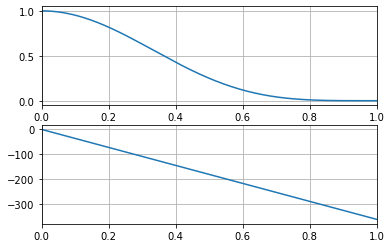

In [6]:
hn = [1/16, 1/4, 3/8, 1/4, 1/16]

N = 512 # "DTFT" resolution
 
Hw = np.fft.rfft(hn, N)  # Calculate the frequency response of the filter
w = np.fft.rfftfreq(N)*2*np.pi  # An array of frequency values matching the frequency response

# Extract magnitude response 
Hw_mag = np.abs(Hw)  
# Extract phase response (use "unwrap" to allow for phase angles >= 180 degrees)
Hw_phase = np.unwrap(np.angle(Hw, deg=True), period=360.0)  

# Present the frequency response graphically.
plt.close(1); plt.figure(1)
plt.subplot(2,1,1)
plt.plot(w/pi, Hw_mag)
plt.grid(True)
plt.xlim([0, 1])
plt.subplot(2,1,2)
plt.plot(w/pi, Hw_phase)
plt.grid(True)
plt.xlim([0, 1])
# WRITE YOUR CODE IN THIS CELL:

[Here](figures/task1a_lf.png) is a suggestion for what the frequency response may look like.


In [3]:
from hashlib import sha1
assert sha1(','.join([str(round(x, 4)) for x in hn]).encode('utf-8')+b'e585b').hexdigest() == '6e8c3cc9a0848699392e531a850d7229e8b59ed8', 'Wrong answer for hn :('
print('Correct answer for hn :)')

Correct answer for hn :)



## b) 

Using the definition of the DTFT: $H(w) = h[0]\cdot e^{-j\omega\cdot 0} + h[1]\cdot e^-{j\omega\cdot 1} + \ldots + h[M-1]\cdot e^{-j\omega\cdot (M-1)}$, use Python/numpy to calculate the frequency response of the filter for the frequency $\omega_1=\frac{\pi}{3}$ specifically.

In [25]:
M = len(hn)

freq = pi/3

Hw_1 = np.sum(hn * np.exp(-1j * freq * np.arange(M)))
# WRITE YOUR CODE IN THIS CELL:

(-0.2812499999999999-0.4871392896287468j)


In [8]:
from hashlib import sha1
import numpy as np
Hw_real = np.real(Hw_1)
Hw_imag = np.imag(Hw_1)
assert sha1(str(round(Hw_real, 4)).encode('utf-8')+b'7031e').hexdigest() == '79c1400b1329e9d37985053c664b874d628a1fd6', 'Wrong answer for Hw_real :('
print('Correct answer for Hw_real :)')
assert sha1(str(round(Hw_imag, 4)).encode('utf-8')+b'de0f5').hexdigest() == '2278447b3e4e32c9cda9b19f95e8ae4d0fcaf5f6', 'Wrong answer for Hw_imag :('
print('Correct answer for Hw_imag :)')

Correct answer for Hw_real :)
Correct answer for Hw_imag :)


## c)
Given an input signal $x[n] = 8 \cdot \cos\left(\omega_1 \cdot n - \frac{\pi}{3}\right), \ \ \omega_1 = \frac{\pi}{3}$, the output $y[n]$ can be written as:
$$y[n] = A_y \cdot \cos\left(\omega_1 \cdot n + \phi_y\right)$$
Use the answer from taks **b)** to claculate the values of $A_y$ and $\phi_y$ (use radians as unit for phase angle $\phi_y$)

In [51]:
A_y = np.abs(Hw_1)*8
phi_y = -pi/3+np.angle(Hw_1)
print(A_y, phi_y)
# WRITE YOUR CODE IN THIS CELL:

4.5 -3.141592653589793


In [27]:
from hashlib import sha1
assert sha1(str(round(A_y, 1)).encode('utf-8')+b'78f94').hexdigest() == '03a8d75eaf9cdff7e5177c66e3772e081c148b98', 'Wrong answer for A_y :('
print('Correct answer for A_y :)')
assert sha1(str(round(phi_y, 4)).encode('utf-8')+b'b6a22').hexdigest() == 'c2341e8e0956c513e50f1ffa1701fb7a62abec1f', 'Wrong answer for phi_y :('
print('Correct answer for phi_y :)')

Correct answer for A_y :)
Correct answer for phi_y :)


## d)
Use the numpy-function `convolve` to filter the signal $x[n], 0 \leq n < 60$, and create a stem plot of both the input $x[n]$ and output $y[n]$. For which range of samples $n_1 \leq n \leq n_2$ can the output signal $y[n]$ be considered **valid** (i.e. the output is in a "steady state", where there is full overlap between $h[n]$ and $x[n]$)?

Also, answer the following question i the text field: "Can you verify the magnitude and phase of the output $y[n]$ by inspecting the plotted signals? If so, how?"

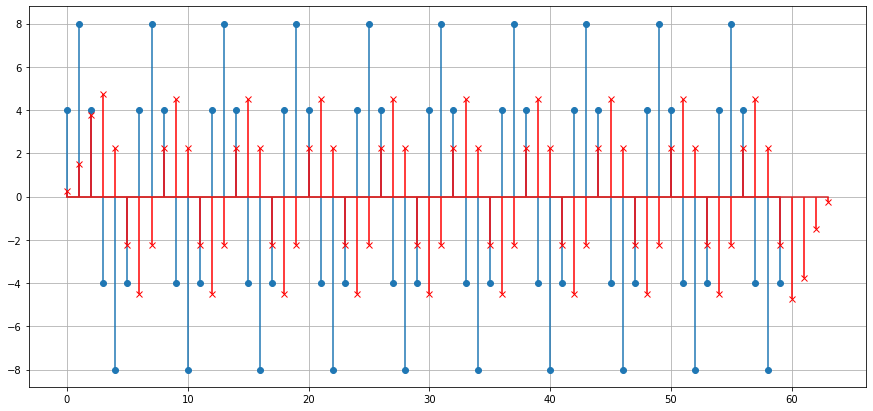

In [58]:
n = np.arange(60)
xn = 8*np.cos(pi/3*n-pi/3)

yn = np.convolve(xn,hn)
n_y = np.arange(len(yn))


plt.close(3);plt.figure(3,figsize=(15,7))
plt.stem(n,xn)
plt.stem(n_y,yn, linefmt="r", markerfmt="rx")
plt.grid()

n_1 = 4
n_2 = 59
# WRITE YOUR CODE IN THIS CELL:

[Here](figures/task1d_lf.png) is a figure showing what $x[n]$ and $y[n]$ should look like.

In [57]:
from hashlib import sha1
assert sha1(str(round(n_1)).encode('utf-8')+b'97470').hexdigest() == '2f94f42860c6b2234f92eef450a90fcfb2fb7b64', 'Wrong answer for n_1 :('
print('Correct answer for n_1 :)')
assert sha1(str(round(n_2)).encode('utf-8')+b'2b376').hexdigest() == '59788c57d9a55275fb665647b37b2a96b99cd47e', 'Wrong answer for n_2 :('
print('Correct answer for n_2 :)')

Correct answer for n_1 :)
Correct answer for n_2 :)


ANSWER THEORY QUESTIONS HERE:

Magnituden på yn ser man på plottet er mellom 4 og 5. Vi ser at yn ligger 2 samples bak xn. Perioden på xn er 6 samples. Vi ser at yn er forskyvet med 2 samples. 2/6 = 1/3. faseforskyvninga er 1/3.

### Fast convolution

As discussed in the beginning of this problem, convolution in the time domain equals multiplication in the frequency domain. An implication of this, is that we can use the FFT and IFFT as a "computational shortcut" to convolving signals which will require fewer processor cycles than computing convolution directly once the filter length becomes sufficiently large (roughly $M > 80$). However, both inputs to the convolution operation needs to be padded to the correct output length *before* calculating the FFT, otherwise we risk performing [circular convolution](https://en.wikipedia.org/wiki/Circular_convolution), which is a somewhat different mathematical process. 

## e)

Write a python script which uses FFT and IFFT to perform the convolution between $x[n]$ and $h[n]$, and use for instance the numpy-function [allclose](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html) to verify that the result is the same as in problem **d)**

In [62]:
# WRITE YOUR CODE IN THIS CELL:
L_y = len(xn) + len(hn) - 1

Xm = np.fft.rfft(xn, L_y)
Hm = np.fft.rfft(hn, L_y)

Ym = Xm*Hm

yn_1 = np.fft.irfft(Ym)

print(np.allclose(yn,yn_1))


True
